In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import astropy.io.fits as fits

## Cutting the light curve by individual pulses

In [2]:
def cutting(time, rate, period, binsize, start, number, show='no', left=0, right=10000):
    # all the needed lists:
    I = [] # mean intensity for each pulse
    r = [] # rate, divided by pulses
    t_start = [] # time boundaries of each pulse
    t_stop = []
    
    # in case I need to see what's going on
    if show == 'show' or show == 'save':
            fig = plt.figure(figsize=(14,7))
            plt.title('Light curve with normalization for each pulse', fontsize=18)
            plt.xlabel('Time, s', fontsize=16)
            plt.ylabel('Count rate, normalized units', fontsize=16)
            plt.xlim(left, right)
            plt.gca().tick_params(labelsize=14)
    
    # the main cutting process
    for i in range(number):
        stop = start + period / binsize # define the time interval for one pulse
        I.append(np.nanmean(rate[round(start):round(stop)])) # calculate mean intensity for the pulse
        r.append(rate[round(start):round(stop)])
        t_start.append(time[round(start)]) # add time boundaries
        t_stop.append(time[round(stop)])
        
        if show == 'show' or show == 'save':
            plt.plot(time[round(start):round(stop)], rate[round(start):round(stop)] / I[i], c='#1f77b4')
            
        start = stop
        
    if show == 'save':
        plt.savefig('lc normed ' + str(left)[:4]+'.png', dpi=250)
    elif show == 'show':
        plt.show()
    
    return I, r, start, t_start, t_stop

In [3]:
lcA = fits.open('reA.lc')

In [4]:
timeA = lcA[1].data.TIME
rateA = lcA[1].data.RATE

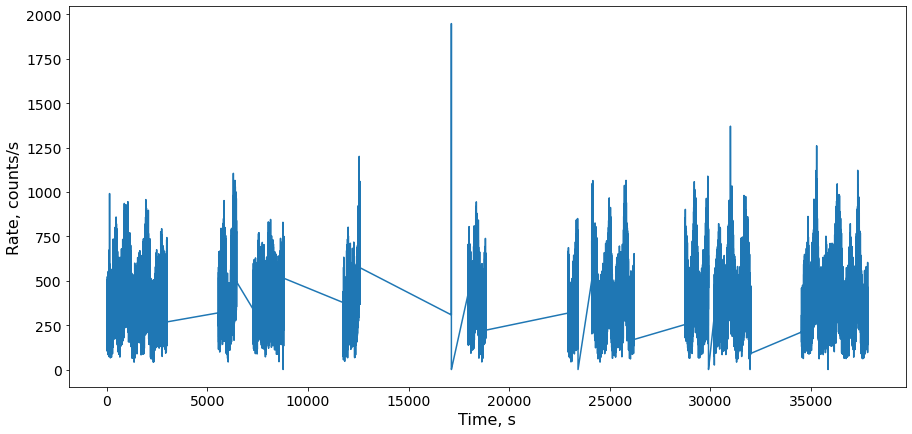

In [5]:
plt.figure(figsize=(15,7))
plt.xlabel('Time, s', fontsize=16)
plt.ylabel('Rate, counts/s', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.plot(timeA, rateA)
# plt.xlim(37500, 38000)
# plt.ylim(0, 600)
plt.show()

In [6]:
# making mask to see where the empty spaces are
timeA[np.where(np.diff(timeA) > 0.15)[0]]

array([  118.        ,   121.        ,   129.        ,   134.        ,
         138.        ,   140.        ,   146.        ,  2958.        ,
        2958.59999999,  2959.        ,  2960.        ,  2962.40000001,
        2963.        ,  2963.59999999,  2965.        ,  3005.        ,
        3005.40000001,  6003.09999999,  6007.09999999,  6016.09999999,
        6024.09999999,  6029.09999999,  6037.09999999,  6045.09999999,
        6051.09999999,  6055.09999999,  6057.09999999,  6064.09999999,
        6080.09999999,  6082.09999999,  6123.09999999,  6126.09999999,
        6156.09999999,  6158.09999999,  6308.09999999,  6404.09999999,
        6427.09999999,  6442.09999999,  6450.09999999,  8763.19999999,
        8767.59999999,  8769.19999999,  8769.59999999,  8807.19999999,
        8807.80000001, 12597.19999999, 17131.30000001, 18842.40000001,
       22930.90000001, 23426.5       , 26171.5       , 26172.09999999,
       26217.5       , 28734.        , 29911.59999999, 31974.69999999,
      

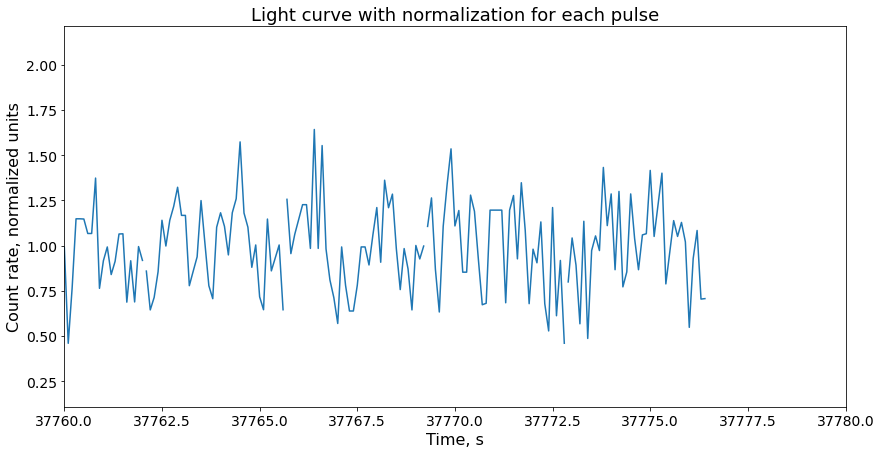

158226.34000000742

In [7]:
# example of using the cutting function
cutting(timeA, rateA, period=3.614, binsize=0.1, start=139036, number=531, left=37760, right=37780, show='show')[2]

In [8]:
# collecting all the pulses
IA = cutting(timeA, rateA, period=3.614, binsize=0.1, start=9, number=32, left=100, right=120)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=1396, number=777, left=2940, right=2960)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=29515, number=10, left=3000, right=3020)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=29900, number=123, left=5990, right=6010)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=34857, number=40, left=6300, right=6320)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=36348, number=24, left=6400, right=6420)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=37277, number=4, left=6410, right=6430)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=37643, number=411, left=8750, right=8770)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=52548, number=9, left=8800, right=8820)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=52935, number=232, left=12580, right=12600)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=61377, number=247, left=18840, right=18860)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=70353, number=135, left=23420, right=23440)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=75298, number=570, left=26160, right=26180)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=95967, number=10, left=26200, right=26220)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=96422, number=323, left=29900, right=29920)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=108128, number=494, left=31960, right=31980)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=126044, number=9, left=32000, right=32020)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=126513, number=345, left=35780, right=35800)[0]
IA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=139036, number=531, left=37760, right=37780)[0]
IA = np.array(IA)

In [9]:
# and their time boundaries
t_startA = cutting(timeA, rateA, period=3.614, binsize=0.1, start=9, number=32, left=100, right=120)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=1396, number=777, left=2940, right=2960)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=29515, number=10, left=3000, right=3020)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=29900, number=123, left=5990, right=6010)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=34857, number=40, left=6300, right=6320)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=36348, number=24, left=6400, right=6420)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=37277, number=4, left=6410, right=6430)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=37643, number=411, left=8750, right=8770)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=52548, number=9, left=8800, right=8820)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=52935, number=232, left=12580, right=12600)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=61377, number=247, left=18840, right=18860)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=70353, number=135, left=23420, right=23440)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=75298, number=570, left=26160, right=26180)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=95967, number=10, left=26200, right=26220)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=96422, number=323, left=29900, right=29920)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=108128, number=494, left=31960, right=31980)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=126044, number=9, left=32000, right=32020)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=126513, number=345, left=35780, right=35800)[3]
t_startA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=139036, number=531, left=37760, right=37780)[3]
t_startA = np.array(t_startA)

In [10]:
t_stopA = cutting(timeA, rateA, period=3.614, binsize=0.1, start=9, number=32, left=100, right=120)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=1396, number=777, left=2940, right=2960)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=29515, number=10, left=3000, right=3020)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=29900, number=123, left=5990, right=6010)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=34857, number=40, left=6300, right=6320)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=36348, number=24, left=6400, right=6420)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=37277, number=4, left=6410, right=6430)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=37643, number=411, left=8750, right=8770)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=52548, number=9, left=8800, right=8820)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=52935, number=232, left=12580, right=12600)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=61377, number=247, left=18840, right=18860)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=70353, number=135, left=23420, right=23440)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=75298, number=570, left=26160, right=26180)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=95967, number=10, left=26200, right=26220)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=96422, number=323, left=29900, right=29920)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=108128, number=494, left=31960, right=31980)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=126044, number=9, left=32000, right=32020)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=126513, number=345, left=35780, right=35800)[4]
t_stopA += cutting(timeA, rateA, period=3.614, binsize=0.1, start=139036, number=531, left=37760, right=37780)[4]
t_stopA = np.array(t_stopA)

In [11]:
# how many pulses we've got
IA.shape

(4326,)

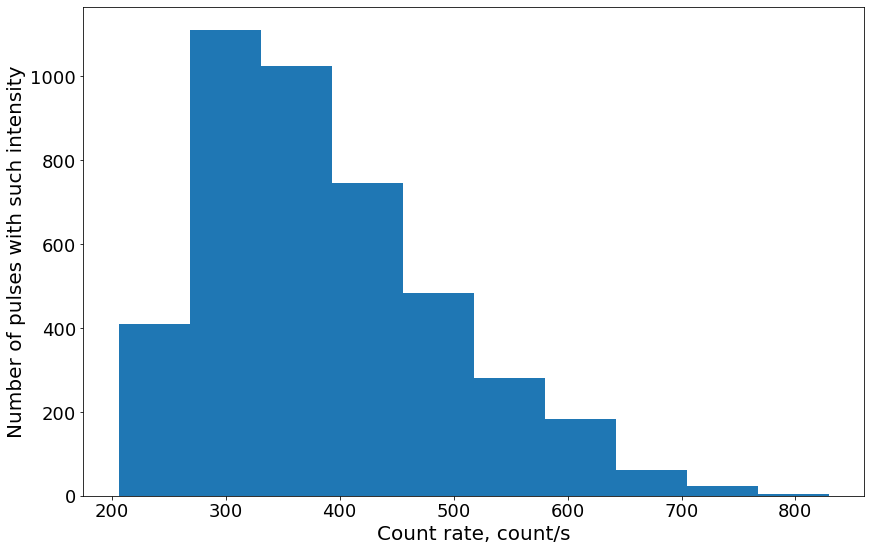

In [12]:
fig = plt.figure(figsize=(14,9))
plt.xlabel('Count rate, count/s', fontsize=20)
plt.ylabel('Number of pulses with such intensity', fontsize=20)
plt.hist(IA, 10)
ax = plt.gca()
ax.tick_params(labelsize=18)
#plt.savefig('hist2.png', dpi=300)

## Defining 4 groups of pulses by their intensity

In [14]:
def percentile(a):
    b = np.sort(np.array(a))
    perc = []
    for i in b:
        perc.append(np.sum(np.where(b >= i, 1, 0)) / b.shape[0])
    return np.array(perc)

In [15]:
pA = percentile(IA)
IA_sorted = np.sort(IA)

In [16]:
pA1 = (IA_sorted[np.where(pA >= 0.75)][0], IA_sorted[np.where(pA >= 0.75)][-1])
pA2 = (IA_sorted[np.where((pA >= 0.5) & (pA < 0.75))][0], IA_sorted[np.where((pA >= 0.5) & (pA < 0.75))][-1])
pA3 = (IA_sorted[np.where((pA >= 0.25) & (pA < 0.5))][0], IA_sorted[np.where((pA >= 0.25) & (pA < 0.5))][-1])
pA4 = (IA_sorted[np.where(pA < 0.25)][0], IA_sorted[np.where(pA < 0.25)][-1])
pA1 # <- the first intensity interval

(206.11948, 307.51083)

## Making GTI files

In [17]:
# choosing pulses
t_startA1 = t_startA[IA < 307.5]
t_stopA1 = t_stopA[IA < 307.5]

In [18]:
# checking quantity
t_startA1.shape

(1081,)

In [19]:
# combining adjacent periods into one time interval
i_startA1 = np.where(t_startA1[1:] != t_stopA1[:-1])[0] + 1
i_stopA1 = np.where(t_startA1[1:] != t_stopA1[:-1])[0]

In [21]:
# adding the first start time and the last stop time
startA1 = np.insert(t_startA1[i_startA1], 0, t_startA1[0])
stopA1 = np.append(t_stopA1[i_stopA1], t_stopA1[-1])

In [22]:
# final arrays
startA1[:10], stopA1[:10]

(array([  0.90000001,  76.80000001, 109.30000001, 148.90000001,
        163.40000001, 206.69999999, 217.59999999, 260.90000001,
        571.69999999, 582.59999999]),
 array([ 69.59999999, 102.09999999, 112.90000001, 159.69999999,
        199.5       , 210.30000001, 239.30000001, 289.80000001,
        579.        , 586.19999999]))

In [23]:
# opening gti file to copy header from it
gtifile = fits.open('A01_gti.fits')

In [24]:
# making new gti file
c1 = fits.Column(name='START', format='1D', unit='s', array=startA1)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stopA1)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifile[1].header, name=gtifile[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('A1_gti.fits', overwrite=True)

In [25]:
# updating headers
with fits.open('A1_gti.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lcA[0].header['TELESCOP'], lcA[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lcA[0].header['INSTRUME'], lcA[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lcA[0].header['OBJECT'], lcA[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lcA[0].header['DATE-OBS'], lcA[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lcA[0].header['DATE-END'], lcA[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lcA[0].header['TSTART'], lcA[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lcA[0].header['TSTOP'], lcA[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lcA[0].header['MJD-OBS'], lcA[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lcA[0].header['MJDREFI'], lcA[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lcA[0].header['MJDREFF'], lcA[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lcA[0].header['TIMEREF'], lcA[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lcA[0].header['TIMESYS'], lcA[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lcA[0].header['TIMEUNIT'], lcA[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lcA[0].header['TIMEDEL'], lcA[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lcA[2].header['TELESCOP'], lcA[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lcA[2].header['INSTRUME'], lcA[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lcA[2].header['OBJECT'], lcA[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lcA[2].header['DATE-OBS'], lcA[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lcA[2].header['DATE-END'], lcA[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lcA[2].header['TSTART'], lcA[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lcA[2].header['TSTOP'], lcA[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lcA[2].header['MJD-OBS'], lcA[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lcA[2].header['MJDREFI'], lcA[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lcA[2].header['MJDREFF'], lcA[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lcA[2].header['TIMEREF'], lcA[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lcA[2].header['TIMESYS'], lcA[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lcA[2].header['TIMEUNIT'], lcA[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lcA[1].header['TIMEZERO'], lcA[1].header.comments['TIMEZERO'])

In [27]:
gti1 = fits.open('A1_gti.fits')

In [28]:
# checking the result
gti1[1].data

FITS_rec([(9.00000006e-01,    69.59999999),
          (7.68000000e+01,   102.09999999),
          (1.09300000e+02,   112.90000001),
          (1.48900000e+02,   159.69999999),
          (1.63400000e+02,   199.5       ),
          (2.06700000e+02,   210.30000001),
          (2.17600000e+02,   239.30000001),
          (2.60900000e+02,   289.80000001),
          (5.71700000e+02,   579.        ),
          (5.82600000e+02,   586.19999999),
          (5.93400000e+02,   676.5       ),
          (6.83800000e+02,   698.19999999),
          (7.12700000e+02,   716.30000001),
          (1.20420000e+03,  1207.80000001),
          (1.21500000e+03,  1384.90000001),
          (1.39570000e+03,  1406.59999999),
          (1.41380000e+03,  1424.59999999),
          (1.43550000e+03,  1449.90000001),
          (1.45360000e+03,  1471.59999999),
          (1.47890000e+03,  1511.40000001),
          (1.51500000e+03,  1522.19999999),
          (1.52940000e+03,  1533.09999999),
          (1.69570000e+03,  1710

In [29]:
pA2

(307.55878, 369.5925)

In [34]:
t_startA2 = t_startA[(IA >= 307.5) & (IA < 369.55)]
t_stopA2 = t_stopA[(IA >= 307.5) & (IA < 369.55)]

In [35]:
t_startA2.shape

(1082,)

In [36]:
i_startA2 = np.where(t_startA2[1:] != t_stopA2[:-1])[0] + 1
i_stopA2 = np.where(t_startA2[1:] != t_stopA2[:-1])[0]

startA2 = np.insert(t_startA2[i_startA2], 0, t_startA2[0])
stopA2 = np.append(t_stopA2[i_stopA2], t_stopA2[-1])

In [37]:
startA2[:10], stopA2[:10]

(array([ 69.59999999, 102.09999999, 112.90000001, 159.69999999,
        199.5       , 210.30000001, 239.30000001, 289.80000001,
        315.09999999, 550.09999999]),
 array([ 76.80000001, 109.30000001, 116.5       , 163.40000001,
        206.69999999, 217.59999999, 260.90000001, 307.90000001,
        318.80000001, 557.30000001]))

In [38]:
c1 = fits.Column(name='START', format='1D', unit='s', array=startA2)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stopA2)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifile[1].header, name=gtifile[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('A2_gti.fits', overwrite=True)

In [39]:
with fits.open('A2_gti.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lcA[0].header['TELESCOP'], lcA[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lcA[0].header['INSTRUME'], lcA[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lcA[0].header['OBJECT'], lcA[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lcA[0].header['DATE-OBS'], lcA[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lcA[0].header['DATE-END'], lcA[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lcA[0].header['TSTART'], lcA[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lcA[0].header['TSTOP'], lcA[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lcA[0].header['MJD-OBS'], lcA[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lcA[0].header['MJDREFI'], lcA[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lcA[0].header['MJDREFF'], lcA[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lcA[0].header['TIMEREF'], lcA[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lcA[0].header['TIMESYS'], lcA[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lcA[0].header['TIMEUNIT'], lcA[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lcA[0].header['TIMEDEL'], lcA[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lcA[2].header['TELESCOP'], lcA[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lcA[2].header['INSTRUME'], lcA[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lcA[2].header['OBJECT'], lcA[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lcA[2].header['DATE-OBS'], lcA[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lcA[2].header['DATE-END'], lcA[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lcA[2].header['TSTART'], lcA[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lcA[2].header['TSTOP'], lcA[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lcA[2].header['MJD-OBS'], lcA[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lcA[2].header['MJDREFI'], lcA[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lcA[2].header['MJDREFF'], lcA[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lcA[2].header['TIMEREF'], lcA[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lcA[2].header['TIMESYS'], lcA[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lcA[2].header['TIMEUNIT'], lcA[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lcA[1].header['TIMEZERO'], lcA[1].header.comments['TIMEZERO'])

In [40]:
gti2 = fits.open('A2_gti.fits')
gti2[1].data

FITS_rec([(   69.59999999,    76.80000001),
          (  102.09999999,   109.30000001),
          (  112.90000001,   116.5       ),
          (  159.69999999,   163.40000001),
          (  199.5       ,   206.69999999),
          (  210.30000001,   217.59999999),
          (  239.30000001,   260.90000001),
          (  289.80000001,   307.90000001),
          (  315.09999999,   318.80000001),
          (  550.09999999,   557.30000001),
          (  560.90000001,   571.69999999),
          (  579.        ,   582.59999999),
          (  586.19999999,   593.40000001),
          (  676.5       ,   683.80000001),
          (  698.19999999,   701.80000001),
          (  709.09999999,   712.69999999),
          (  716.30000001,   727.09999999),
          (  734.40000001,   748.80000001),
          (  759.69999999,   763.30000001),
          (  766.90000001,   777.69999999),
          (  810.30000001,   813.90000001),
          ( 1197.        ,  1204.19999999),
          ( 1211.40000001,  1215

In [41]:
pA3

(369.89368, 450.86984)

In [43]:
t_startA3 = t_startA[(IA >= 369.55) & (IA < 450.8)]
t_stopA3 = t_stopA[(IA >= 369.55) & (IA < 450.8)]
t_startA3.shape

(1081,)

In [44]:
i_startA3 = np.where(t_startA3[1:] != t_stopA3[:-1])[0] + 1
i_stopA3 = np.where(t_startA3[1:] != t_stopA3[:-1])[0]

startA3 = np.insert(t_startA3[i_startA3], 0, t_startA3[0])
stopA3 = np.append(t_stopA3[i_stopA3], t_stopA3[-1])

startA3[:10], stopA3[:10]

(array([307.90000001, 318.80000001, 326.        , 376.59999999,
        391.        , 398.30000001, 506.69999999, 557.30000001,
        701.80000001, 727.09999999]),
 array([315.09999999, 322.40000001, 365.69999999, 387.40000001,
        394.69999999, 405.5       , 550.09999999, 560.90000001,
        709.09999999, 734.40000001]))

In [45]:
c1 = fits.Column(name='START', format='1D', unit='s', array=startA3)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stopA3)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifile[1].header, name=gtifile[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('A3_gti.fits', overwrite=True)

In [46]:
with fits.open('A3_gti.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lcA[0].header['TELESCOP'], lcA[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lcA[0].header['INSTRUME'], lcA[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lcA[0].header['OBJECT'], lcA[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lcA[0].header['DATE-OBS'], lcA[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lcA[0].header['DATE-END'], lcA[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lcA[0].header['TSTART'], lcA[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lcA[0].header['TSTOP'], lcA[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lcA[0].header['MJD-OBS'], lcA[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lcA[0].header['MJDREFI'], lcA[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lcA[0].header['MJDREFF'], lcA[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lcA[0].header['TIMEREF'], lcA[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lcA[0].header['TIMESYS'], lcA[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lcA[0].header['TIMEUNIT'], lcA[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lcA[0].header['TIMEDEL'], lcA[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lcA[2].header['TELESCOP'], lcA[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lcA[2].header['INSTRUME'], lcA[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lcA[2].header['OBJECT'], lcA[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lcA[2].header['DATE-OBS'], lcA[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lcA[2].header['DATE-END'], lcA[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lcA[2].header['TSTART'], lcA[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lcA[2].header['TSTOP'], lcA[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lcA[2].header['MJD-OBS'], lcA[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lcA[2].header['MJDREFI'], lcA[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lcA[2].header['MJDREFF'], lcA[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lcA[2].header['TIMEREF'], lcA[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lcA[2].header['TIMESYS'], lcA[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lcA[2].header['TIMEUNIT'], lcA[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lcA[1].header['TIMEZERO'], lcA[1].header.comments['TIMEZERO'])

In [47]:
gti3 = fits.open('A3_gti.fits')
gti3[1].data

FITS_rec([(  307.90000001,   315.09999999),
          (  318.80000001,   322.40000001),
          (  326.        ,   365.69999999),
          (  376.59999999,   387.40000001),
          (  391.        ,   394.69999999),
          (  398.30000001,   405.5       ),
          (  506.69999999,   550.09999999),
          (  557.30000001,   560.90000001),
          (  701.80000001,   709.09999999),
          (  727.09999999,   734.40000001),
          (  748.80000001,   759.69999999),
          (  763.30000001,   766.90000001),
          (  777.69999999,   792.19999999),
          (  795.80000001,   810.30000001),
          (  813.90000001,   824.69999999),
          (  835.59999999,   842.80000001),
          (  846.40000001,   864.5       ),
          (  889.80000001,   893.40000001),
          (  987.30000001,   991.        ),
          ( 1030.69999999,  1034.30000001),
          ( 1045.19999999,  1048.80000001),
          ( 1056.        ,  1059.59999999),
          ( 1074.09999999,  1077

In [48]:
pA4

(451.1128, 829.30817)

In [50]:
t_startA4 = t_startA[IA >= 450.8]
t_stopA4 = t_stopA[IA >= 450.8]
t_startA4.shape

(1082,)

In [51]:
i_startA4 = np.where(t_startA4[1:] != t_stopA4[:-1])[0] + 1
i_stopA4 = np.where(t_startA4[1:] != t_stopA4[:-1])[0]

startA4 = np.insert(t_startA4[i_startA4], 0, t_startA4[0])
stopA4 = np.append(t_stopA4[i_stopA4], t_stopA4[-1])

startA4[:10], stopA4[:10]

(array([322.40000001, 365.69999999, 387.40000001, 394.69999999,
        405.5       , 792.19999999, 824.69999999, 842.80000001,
        864.5       , 893.40000001]),
 array([326.        , 376.59999999, 391.        , 398.30000001,
        506.69999999, 795.80000001, 835.59999999, 846.40000001,
        889.80000001, 987.30000001]))

In [52]:
c1 = fits.Column(name='START', format='1D', unit='s', array=startA4)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stopA4)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifile[1].header, name=gtifile[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('A4_gti.fits', overwrite=True)

In [53]:
with fits.open('A4_gti.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lcA[0].header['TELESCOP'], lcA[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lcA[0].header['INSTRUME'], lcA[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lcA[0].header['OBJECT'], lcA[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lcA[0].header['DATE-OBS'], lcA[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lcA[0].header['DATE-END'], lcA[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lcA[0].header['TSTART'], lcA[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lcA[0].header['TSTOP'], lcA[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lcA[0].header['MJD-OBS'], lcA[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lcA[0].header['MJDREFI'], lcA[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lcA[0].header['MJDREFF'], lcA[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lcA[0].header['TIMEREF'], lcA[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lcA[0].header['TIMESYS'], lcA[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lcA[0].header['TIMEUNIT'], lcA[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lcA[0].header['TIMEDEL'], lcA[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lcA[2].header['TELESCOP'], lcA[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lcA[2].header['INSTRUME'], lcA[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lcA[2].header['OBJECT'], lcA[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lcA[2].header['DATE-OBS'], lcA[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lcA[2].header['DATE-END'], lcA[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lcA[2].header['TSTART'], lcA[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lcA[2].header['TSTOP'], lcA[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lcA[2].header['MJD-OBS'], lcA[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lcA[2].header['MJDREFI'], lcA[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lcA[2].header['MJDREFF'], lcA[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lcA[2].header['TIMEREF'], lcA[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lcA[2].header['TIMESYS'], lcA[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lcA[2].header['TIMEUNIT'], lcA[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lcA[1].header['TIMEZERO'], lcA[1].header.comments['TIMEZERO'])

In [54]:
gti4 = fits.open('A4_gti.fits')
gti4[1].data

FITS_rec([(  322.40000001,   326.        ),
          (  365.69999999,   376.59999999),
          (  387.40000001,   391.        ),
          (  394.69999999,   398.30000001),
          (  405.5       ,   506.69999999),
          (  792.19999999,   795.80000001),
          (  824.69999999,   835.59999999),
          (  842.80000001,   846.40000001),
          (  864.5       ,   889.80000001),
          (  893.40000001,   987.30000001),
          (  991.        ,  1030.69999999),
          ( 1034.30000001,  1045.19999999),
          ( 1048.80000001,  1056.        ),
          ( 1059.59999999,  1074.09999999),
          ( 1077.69999999,  1081.30000001),
          ( 1084.90000001,  1088.5       ),
          ( 1095.80000001,  1121.09999999),
          ( 1124.69999999,  1131.90000001),
          ( 1139.09999999,  1157.19999999),
          ( 1168.        ,  1171.69999999),
          ( 1619.80000001,  1623.40000001),
          ( 1818.59999999,  1825.80000001),
          ( 1876.40000001,  2035

## The same procedure for FPMB

In [56]:
lcB = fits.open('reB.lc')
timeB = lcB[1].data.TIME
rateB = lcB[1].data.RATE

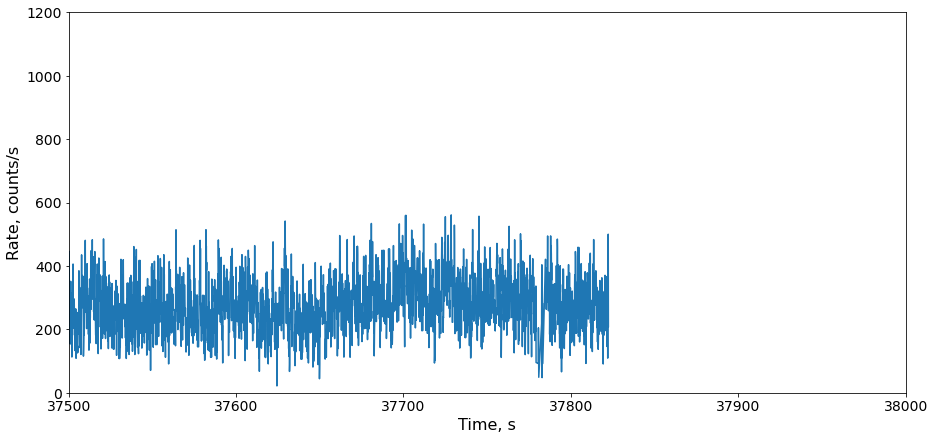

In [450]:
plt.figure(figsize=(15,7))
plt.xlabel('Time, s', fontsize=16)
plt.ylabel('Rate, counts/s', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.plot(timeB, rateB)
plt.xlim(37500, 38000)
plt.ylim(0, 1200)
plt.show()

In [86]:
tf = (timeB[np.where(np.diff(timeB) > 0.15)[0]] == timeA[np.where(np.diff(timeA) > 0.15)[0]])

In [94]:
np.where(tf == False)[0]

array([46, 49, 54, 66])

In [95]:
timeB[np.where(np.diff(timeB) > 0.15)[0]][np.where(tf == False)[0]]

array([17134.30000001, 23430.5       , 29914.59999999, 35796.69999999])

In [96]:
timeA[np.where(np.diff(timeA) > 0.15)[0]][np.where(tf == False)[0]]

array([17131.30000001, 23426.5       , 29911.59999999, 35798.69999999])

In [97]:
timeB[np.where(np.diff(timeB) > 0.15)[0]]

array([  118.        ,   121.        ,   129.        ,   134.        ,
         138.        ,   140.        ,   146.        ,  2958.        ,
        2958.59999999,  2959.        ,  2960.        ,  2962.40000001,
        2963.        ,  2963.59999999,  2965.        ,  3005.        ,
        3005.40000001,  6003.09999999,  6007.09999999,  6016.09999999,
        6024.09999999,  6029.09999999,  6037.09999999,  6045.09999999,
        6051.09999999,  6055.09999999,  6057.09999999,  6064.09999999,
        6080.09999999,  6082.09999999,  6123.09999999,  6126.09999999,
        6156.09999999,  6158.09999999,  6308.09999999,  6404.09999999,
        6427.09999999,  6442.09999999,  6450.09999999,  8763.19999999,
        8767.59999999,  8769.19999999,  8769.59999999,  8807.19999999,
        8807.80000001, 12597.19999999, 17134.30000001, 18842.40000001,
       22930.90000001, 23430.5       , 26171.5       , 26172.09999999,
       26217.5       , 28734.        , 29914.59999999, 31974.69999999,
      

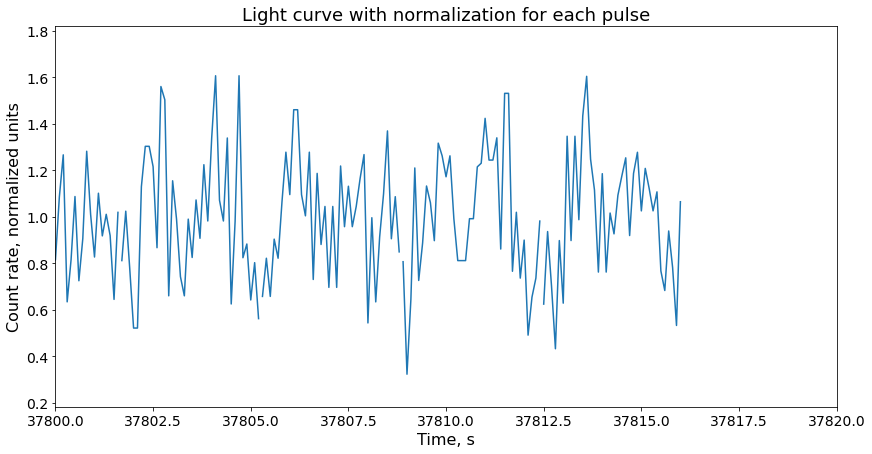

158657.1200000001

In [477]:
cutting(timeB, rateB, period=3.614, binsize=0.1, start=158368, number=8, left=37800, right=37820, show='show')[2]

In [478]:
IB = cutting(timeB, rateB, period=3.614, binsize=0.1, start=9, number=32, left=100, right=120)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=1396, number=777, left=2940, right=2960)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=29515, number=10, left=3000, right=3020)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=29900, number=123, left=5990, right=6010)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=34857, number=40, left=6300, right=6320)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=36348, number=24, left=6400, right=6420)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=37277, number=4, left=6410, right=6430)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=37643, number=411, left=8750, right=8770)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=52548, number=9, left=8800, right=8820)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=52935, number=232, left=12580, right=12600)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=61405, number=247, left=18820, right=18840)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=70381, number=137, left=23420, right=23440)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=75367, number=570, left=26160, right=26180)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=96002, number=11, left=26200, right=26220)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=96456, number=325, left=29900, right=29920)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=108225, number=494, left=31960, right=31980)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=126145, number=9, left=32000, right=32020)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=126613, number=344, left=35780, right=35800)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=139115, number=531, left=37760, right=37780)[0]
IB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=158368, number=8, left=37800, right=37820)[0]
IB = np.array(IB)

In [481]:
t_startB = cutting(timeB, rateB, period=3.614, binsize=0.1, start=9, number=32, left=100, right=120)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=1396, number=777, left=2940, right=2960)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=29515, number=10, left=3000, right=3020)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=29900, number=123, left=5990, right=6010)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=34857, number=40, left=6300, right=6320)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=36348, number=24, left=6400, right=6420)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=37277, number=4, left=6410, right=6430)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=37643, number=411, left=8750, right=8770)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=52548, number=9, left=8800, right=8820)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=52935, number=232, left=12580, right=12600)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=61405, number=247, left=18820, right=18840)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=70381, number=137, left=23420, right=23440)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=75367, number=570, left=26160, right=26180)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=96002, number=11, left=26200, right=26220)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=96456, number=325, left=29900, right=29920)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=108225, number=494, left=31960, right=31980)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=126145, number=9, left=32000, right=32020)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=126613, number=344, left=35780, right=35800)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=139115, number=531, left=37760, right=37780)[3]
t_startB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=158368, number=8, left=37800, right=37820)[3]
t_startB = np.array(t_startB)

In [482]:
t_stopB = cutting(timeB, rateB, period=3.614, binsize=0.1, start=9, number=32, left=100, right=120)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=1396, number=777, left=2940, right=2960)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=29515, number=10, left=3000, right=3020)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=29900, number=123, left=5990, right=6010)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=34857, number=40, left=6300, right=6320)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=36348, number=24, left=6400, right=6420)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=37277, number=4, left=6410, right=6430)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=37643, number=411, left=8750, right=8770)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=52548, number=9, left=8800, right=8820)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=52935, number=232, left=12580, right=12600)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=61405, number=247, left=18820, right=18840)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=70381, number=137, left=23420, right=23440)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=75367, number=570, left=26160, right=26180)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=96002, number=11, left=26200, right=26220)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=96456, number=325, left=29900, right=29920)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=108225, number=494, left=31960, right=31980)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=126145, number=9, left=32000, right=32020)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=126613, number=344, left=35780, right=35800)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=139115, number=531, left=37760, right=37780)[4]
t_stopB += cutting(timeB, rateB, period=3.614, binsize=0.1, start=158368, number=8, left=37800, right=37820)[4]
t_stopB = np.array(t_stopB)

In [479]:
IB.shape

(4338,)

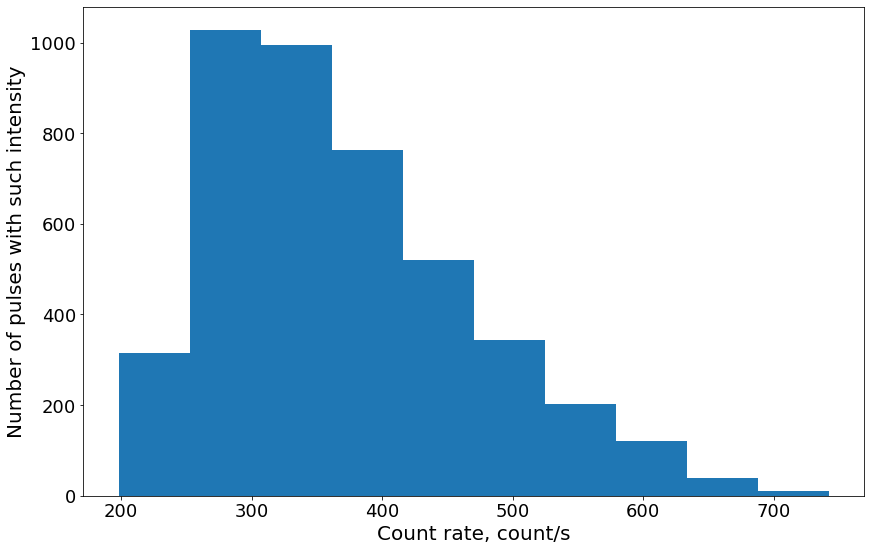

In [480]:
fig = plt.figure(figsize=(14,9))
plt.xlabel('Count rate, count/s', fontsize=20)
plt.ylabel('Number of pulses with such intensity', fontsize=20)
plt.hist(IB, 10)
ax = plt.gca()
ax.tick_params(labelsize=18)
#plt.savefig('hist2.png', dpi=300)

In [483]:
pB = percentile(IB)
IB_sorted = np.sort(IB)

In [484]:
pB1 = (IB_sorted[np.where(pB >= 0.75)][0], IB_sorted[np.where(pB >= 0.75)][-1])
pB2 = (IB_sorted[np.where((pB >= 0.5) & (pB < 0.75))][0], IB_sorted[np.where((pB >= 0.5) & (pB < 0.75))][-1])
pB3 = (IB_sorted[np.where((pB >= 0.25) & (pB < 0.5))][0], IB_sorted[np.where((pB >= 0.25) & (pB < 0.5))][-1])
pB4 = (IB_sorted[np.where(pB < 0.25)][0], IB_sorted[np.where(pB < 0.25)][-1])
pB1

(198.02777, 295.67407)

In [488]:
t_startB1 = t_startB[IB < 295.67]
t_stopB1 = t_stopB[IB < 295.67]
t_startB1.shape

(1084,)

In [489]:
i_startB1 = np.where(t_startB1[1:] != t_stopB1[:-1])[0] + 1
i_stopB1 = np.where(t_startB1[1:] != t_stopB1[:-1])[0]

startB1 = np.insert(t_startB1[i_startB1], 0, t_startB1[0])
stopB1 = np.append(t_stopB1[i_stopB1], t_stopB1[-1])

startB1[:10], stopB1[:10]

(array([  4.5       ,  11.69999999,  22.59999999,  94.90000001,
        105.69999999, 148.90000001, 192.30000001, 210.30000001,
        224.80000001, 260.90000001]),
 array([  8.09999999,  19.        ,  87.59999999, 102.09999999,
        112.90000001, 188.69999999, 199.5       , 214.        ,
        239.30000001, 286.19999999]))

In [490]:
gtifileB = fits.open('B01_gti.fits')

In [491]:
c1 = fits.Column(name='START', format='1D', unit='s', array=startB1)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stopB1)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifileB[1].header, name=gtifileB[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('B1_gti.fits', overwrite=True)

In [492]:
with fits.open('B1_gti.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lcB[0].header['TELESCOP'], lcB[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lcB[0].header['INSTRUME'], lcB[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lcB[0].header['OBJECT'], lcB[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lcB[0].header['DATE-OBS'], lcB[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lcB[0].header['DATE-END'], lcB[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lcB[0].header['TSTART'], lcB[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lcB[0].header['TSTOP'], lcB[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lcB[0].header['MJD-OBS'], lcB[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lcB[0].header['MJDREFI'], lcB[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lcB[0].header['MJDREFF'], lcB[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lcB[0].header['TIMEREF'], lcB[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lcB[0].header['TIMESYS'], lcB[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lcB[0].header['TIMEUNIT'], lcB[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lcB[0].header['TIMEDEL'], lcB[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lcB[2].header['TELESCOP'], lcB[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lcB[2].header['INSTRUME'], lcB[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lcB[2].header['OBJECT'], lcB[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lcB[2].header['DATE-OBS'], lcB[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lcB[2].header['DATE-END'], lcB[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lcB[2].header['TSTART'], lcB[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lcB[2].header['TSTOP'], lcB[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lcB[2].header['MJD-OBS'], lcB[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lcB[2].header['MJDREFI'], lcB[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lcB[2].header['MJDREFF'], lcB[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lcB[2].header['TIMEREF'], lcB[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lcB[2].header['TIMESYS'], lcB[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lcB[2].header['TIMEUNIT'], lcB[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lcB[1].header['TIMEZERO'], lcB[1].header.comments['TIMEZERO'])

In [494]:
gti1 = fits.open('B1_gti.fits')
gti1[1].data

FITS_rec([(4.50000e+00, 8.09999999e+00), (1.17000e+01, 1.90000000e+01),
          (2.26000e+01, 8.76000000e+01), (9.49000e+01, 1.02100000e+02),
          (1.05700e+02, 1.12900000e+02), (1.48900e+02, 1.88700000e+02),
          (1.92300e+02, 1.99500000e+02), (2.10300e+02, 2.14000000e+02),
          (2.24800e+02, 2.39300000e+02), (2.60900e+02, 2.86200000e+02),
          (5.71700e+02, 5.79000000e+02), (5.82600e+02, 5.89800000e+02),
          (5.93400e+02, 6.76500000e+02), (6.83800e+02, 6.98200000e+02),
          (7.41600e+02, 7.45200000e+02), (1.22230e+03, 1.38490000e+03),
          (1.39930e+03, 1.40660000e+03), (1.41740e+03, 1.42460000e+03),
          (1.43550e+03, 1.44630000e+03), (1.45360e+03, 1.47520000e+03),
          (1.47890e+03, 1.51140000e+03), (1.51500e+03, 1.52220000e+03),
          (1.68120e+03, 1.68480000e+03), (1.69570e+03, 1.71010000e+03),
          (1.73540e+03, 1.74990000e+03), (1.75350e+03, 1.76070000e+03),
          (1.77880e+03, 1.78240000e+03), (2.17270e+03, 2.1764000

In [495]:
pB2

(295.68347, 351.25195)

In [498]:
t_startB2 = t_startB[(IB >= 295.67) & (IB < 351.25)]
t_stopB2 = t_stopB[(IB >= 295.67) & (IB < 351.25)]
t_startB2.shape

(1085,)

In [499]:
i_startB2 = np.where(t_startB2[1:] != t_stopB2[:-1])[0] + 1
i_stopB2 = np.where(t_startB2[1:] != t_stopB2[:-1])[0]

startB2 = np.insert(t_startB2[i_startB2], 0, t_startB2[0])
stopB2 = np.append(t_stopB2[i_stopB2], t_stopB2[-1])

startB2[:10], stopB2[:10]

(array([  0.90000001,   8.09999999,  19.        ,  87.59999999,
        102.09999999, 112.90000001, 188.69999999, 199.5       ,
        214.        , 239.30000001]),
 array([  4.5       ,  11.69999999,  22.59999999,  94.90000001,
        105.69999999, 116.5       , 192.30000001, 210.30000001,
        224.80000001, 260.90000001]))

In [500]:
c1 = fits.Column(name='START', format='1D', unit='s', array=startB2)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stopB2)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifileB[1].header, name=gtifileB[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('B2_gti.fits', overwrite=True)

In [501]:
with fits.open('B2_gti.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lcB[0].header['TELESCOP'], lcB[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lcB[0].header['INSTRUME'], lcB[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lcB[0].header['OBJECT'], lcB[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lcB[0].header['DATE-OBS'], lcB[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lcB[0].header['DATE-END'], lcB[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lcB[0].header['TSTART'], lcB[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lcB[0].header['TSTOP'], lcB[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lcB[0].header['MJD-OBS'], lcB[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lcB[0].header['MJDREFI'], lcB[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lcB[0].header['MJDREFF'], lcB[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lcB[0].header['TIMEREF'], lcB[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lcB[0].header['TIMESYS'], lcB[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lcB[0].header['TIMEUNIT'], lcB[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lcB[0].header['TIMEDEL'], lcB[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lcB[2].header['TELESCOP'], lcB[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lcB[2].header['INSTRUME'], lcB[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lcB[2].header['OBJECT'], lcB[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lcB[2].header['DATE-OBS'], lcB[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lcB[2].header['DATE-END'], lcB[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lcB[2].header['TSTART'], lcB[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lcB[2].header['TSTOP'], lcB[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lcB[2].header['MJD-OBS'], lcB[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lcB[2].header['MJDREFI'], lcB[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lcB[2].header['MJDREFF'], lcB[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lcB[2].header['TIMEREF'], lcB[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lcB[2].header['TIMESYS'], lcB[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lcB[2].header['TIMEUNIT'], lcB[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lcB[1].header['TIMEZERO'], lcB[1].header.comments['TIMEZERO'])

In [503]:
pB3

(351.31732, 428.33298)

In [504]:
t_startB3 = t_startB[(IB >= 351.25) & (IB < 428.3)]
t_stopB3 = t_stopB[(IB >= 351.25) & (IB < 428.3)]
t_startB3.shape

(1084,)

In [505]:
i_startB3 = np.where(t_startB3[1:] != t_stopB3[:-1])[0] + 1
i_stopB3 = np.where(t_startB3[1:] != t_stopB3[:-1])[0]

startB3 = np.insert(t_startB3[i_startB3], 0, t_startB3[0])
stopB3 = np.append(t_stopB3[i_stopB3], t_stopB3[-1])

startB3[:10], stopB3[:10]

(array([311.5       , 365.69999999, 376.59999999, 383.80000001,
        394.69999999, 495.80000001, 506.69999999, 517.5       ,
        553.69999999, 716.30000001]),
 array([362.09999999, 373.        , 380.19999999, 391.        ,
        401.90000001, 503.09999999, 513.90000001, 546.40000001,
        560.90000001, 719.90000001]))

In [506]:
c1 = fits.Column(name='START', format='1D', unit='s', array=startB3)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stopB3)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifileB[1].header, name=gtifileB[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('B3_gti.fits', overwrite=True)

with fits.open('B3_gti.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lcB[0].header['TELESCOP'], lcB[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lcB[0].header['INSTRUME'], lcB[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lcB[0].header['OBJECT'], lcB[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lcB[0].header['DATE-OBS'], lcB[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lcB[0].header['DATE-END'], lcB[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lcB[0].header['TSTART'], lcB[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lcB[0].header['TSTOP'], lcB[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lcB[0].header['MJD-OBS'], lcB[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lcB[0].header['MJDREFI'], lcB[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lcB[0].header['MJDREFF'], lcB[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lcB[0].header['TIMEREF'], lcB[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lcB[0].header['TIMESYS'], lcB[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lcB[0].header['TIMEUNIT'], lcB[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lcB[0].header['TIMEDEL'], lcB[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lcB[2].header['TELESCOP'], lcB[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lcB[2].header['INSTRUME'], lcB[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lcB[2].header['OBJECT'], lcB[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lcB[2].header['DATE-OBS'], lcB[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lcB[2].header['DATE-END'], lcB[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lcB[2].header['TSTART'], lcB[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lcB[2].header['TSTOP'], lcB[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lcB[2].header['MJD-OBS'], lcB[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lcB[2].header['MJDREFI'], lcB[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lcB[2].header['MJDREFF'], lcB[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lcB[2].header['TIMEREF'], lcB[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lcB[2].header['TIMESYS'], lcB[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lcB[2].header['TIMEUNIT'], lcB[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lcB[1].header['TIMEZERO'], lcB[1].header.comments['TIMEZERO'])

In [507]:
pB4

(428.43988, 742.1865)

In [508]:
t_startB4 = t_startB[IB >= 428.3]
t_stopB4 = t_stopB[IB >= 428.3]
t_startB4.shape

(1085,)

In [509]:
i_startB4 = np.where(t_startB4[1:] != t_stopB4[:-1])[0] + 1
i_stopB4 = np.where(t_startB4[1:] != t_stopB4[:-1])[0]

startB4 = np.insert(t_startB4[i_startB4], 0, t_startB4[0])
stopB4 = np.append(t_stopB4[i_stopB4], t_stopB4[-1])

startB4[:10], stopB4[:10]

(array([362.09999999, 373.        , 391.        , 401.90000001,
        503.09999999, 513.90000001, 792.19999999, 817.5       ,
        824.69999999, 842.80000001]),
 array([365.69999999, 376.59999999, 394.69999999, 495.80000001,
        506.69999999, 517.5       , 795.80000001, 821.09999999,
        831.90000001, 846.40000001]))

In [510]:
c1 = fits.Column(name='START', format='1D', unit='s', array=startB4)
c2 = fits.Column(name='STOP', format='1D', unit='s',  array=stopB4)

gtiz = fits.BinTableHDU.from_columns([c1, c2], header=gtifileB[1].header, name=gtifileB[1].name)
newprimary = fits.PrimaryHDU()
newhdul = fits.HDUList(hdus=[newprimary, gtiz])

newhdul.writeto('B4_gti.fits', overwrite=True)

with fits.open('B4_gti.fits', mode='update') as hdul:
    hdr0 = hdul[0].header
    hdr1 = hdul[1].header
    
    hdr0['TELESCOP'] = (lcB[0].header['TELESCOP'], lcB[0].header.comments['TELESCOP'])
    hdr0['INSTRUME'] = (lcB[0].header['INSTRUME'], lcB[0].header.comments['INSTRUME'])
    hdr0['OBJECT'] = (lcB[0].header['OBJECT'], lcB[0].header.comments['OBJECT'])
    hdr0['DATE-OBS'] = (lcB[0].header['DATE-OBS'], lcB[0].header.comments['DATE-OBS'])
    hdr0['DATE-END'] = (lcB[0].header['DATE-END'], lcB[0].header.comments['DATE-END'])
    hdr0['TSTART'] = (lcB[0].header['TSTART'], lcB[0].header.comments['TSTART'])
    hdr0['TSTOP'] = (lcB[0].header['TSTOP'], lcB[0].header.comments['TSTOP'])
    hdr0['MJD-OBS'] = (lcB[0].header['MJD-OBS'], lcB[0].header.comments['MJD-OBS'])
    hdr0['MJDREFI'] = (lcB[0].header['MJDREFI'], lcB[0].header.comments['MJDREFI'])
    hdr0['MJDREFF'] = (lcB[0].header['MJDREFF'], lcB[0].header.comments['MJDREFF'])
    hdr0['TIMEREF'] = (lcB[0].header['TIMEREF'], lcB[0].header.comments['TIMEREF'])
    hdr0['TIMESYS'] = (lcB[0].header['TIMESYS'], lcB[0].header.comments['TIMESYS'])
    hdr0['TIMEUNIT'] = (lcB[0].header['TIMEUNIT'], lcB[0].header.comments['TIMEUNIT'])
    hdr0['TIMEDEL'] = (lcB[0].header['TIMEDEL'], lcB[0].header.comments['TIMEDEL'])
    
    hdr1['EXTNAME'] = ('STDGTI  ', 'ext name')
    hdr1['TELESCOP'] = (lcB[2].header['TELESCOP'], lcB[2].header.comments['TELESCOP'])
    hdr1['INSTRUME'] = (lcB[2].header['INSTRUME'], lcB[2].header.comments['INSTRUME'])
    hdr1['OBJECT'] = (lcB[2].header['OBJECT'], lcB[2].header.comments['OBJECT'])
    hdr1['DATE-OBS'] = (lcB[2].header['DATE-OBS'], lcB[2].header.comments['DATE-OBS'])
    hdr1['DATE-END'] = (lcB[2].header['DATE-END'], lcB[2].header.comments['DATE-END'])
    hdr1['TSTART'] = (lcB[2].header['TSTART'], lcB[2].header.comments['TSTART'])
    hdr1['TSTOP'] = (lcB[2].header['TSTOP'], lcB[2].header.comments['TSTOP'])
    hdr1['MJD-OBS'] = (lcB[2].header['MJD-OBS'], lcB[2].header.comments['MJD-OBS'])
    hdr1['MJDREFI'] = (lcB[2].header['MJDREFI'], lcB[2].header.comments['MJDREFI'])
    hdr1['MJDREFF'] = (lcB[2].header['MJDREFF'], lcB[2].header.comments['MJDREFF'])
    hdr1['TIMEREF'] = (lcB[2].header['TIMEREF'], lcB[2].header.comments['TIMEREF'])
    hdr1['TIMESYS'] = (lcB[2].header['TIMESYS'], lcB[2].header.comments['TIMESYS'])
    hdr1['TIMEUNIT'] = (lcB[2].header['TIMEUNIT'], lcB[2].header.comments['TIMEUNIT'])
    hdr1['TIMEZERO'] = (lcB[1].header['TIMEZERO'], lcB[1].header.comments['TIMEZERO'])

In [511]:
lcA1 = fits.open('A1_sr.lc')

In [512]:
timeA1 = lcA1[1].data.TIME
rateA1 = lcA1[1].data.RATE

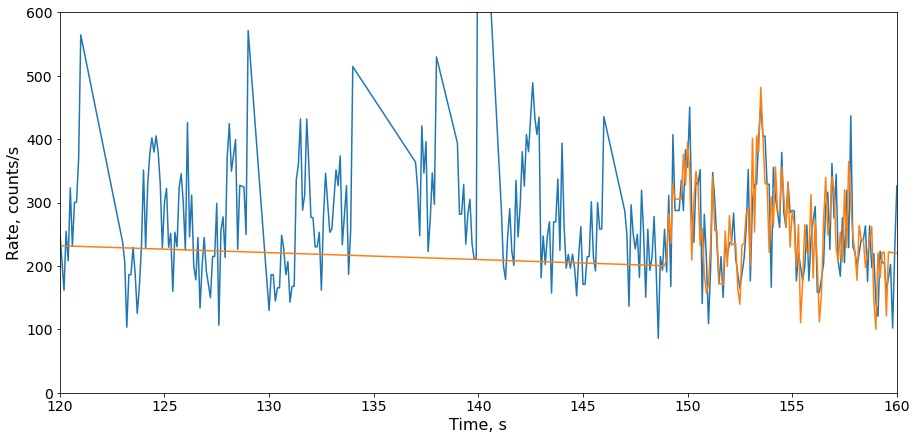

In [520]:
plt.figure(figsize=(15,7))
plt.xlabel('Time, s', fontsize=16)
plt.ylabel('Rate, counts/s', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.plot(timeA, rateA)
plt.plot(timeA1+0.9, rateA1)
plt.xlim(120, 160)
plt.ylim(0, 600)
plt.show()